In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C:/Users/drket/OneDrive/Desktop/Codes/PYTHON/DATA ANALYTICS/PROJECT/DiwaliSalesData.csv',encoding='unicode_escape')
df.shape

(11251, 15)

In [6]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
#DROP UNRELATED/BLANK COLUMNS
df.drop(['Status','unnamed1'],axis = 1,inplace=True)

In [10]:
#CHECK FOR NULL VALUES
pd.isnull(df).sum()
#REMOVING NULL VALUES
df.dropna(inplace=True)

In [11]:
df.shape

(11239, 13)

In [ ]:

#EXAMPLE FOR DIFFERENCE IN INLPACE=TRUE
# data_test = [['madhav',11],['Gopi',15],['Keshav',],['Lalita',16]]
# df_test = pd.DataFrame(data_test,columns=['Name','Age'])
# df_test

In [ ]:
# df_test.dropna(inplace=True)
# df_test

In [17]:
#CHANGING THE DATATYPE
df['Amount'] = df['Amount'].astype('int')

In [18]:
df['Amount'].dtypes

dtype('int32')

In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

EXPLORATORY DATA ANALYSIS

GENDER

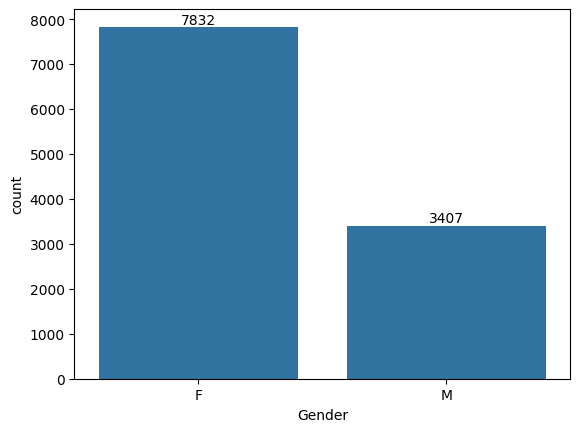

In [20]:
ax = sns.countplot(x = 'Gender',data=df)
# FOR VALUES ON TOP OF EACH BAR
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

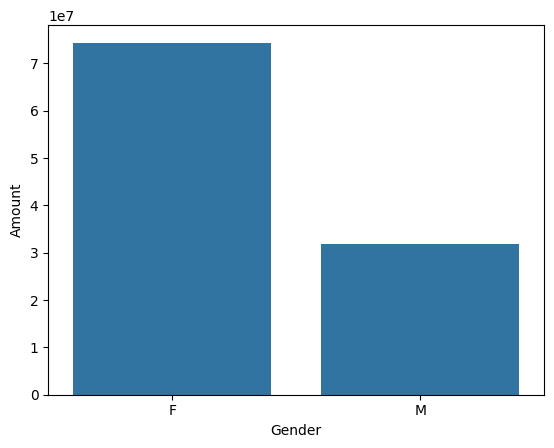

In [21]:
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by = 'Amount',ascending=False)
sns.barplot(x = 'Gender',y = 'Amount',data=sales_gen)

FROM THE ABOVE GRAPHS WE CAN SEE THAT MOST OF THE BYERS ARE FEMALE AND EVEN THE PURCHASING POWER OF FEMALE IS MORE THAN MEN


AGE


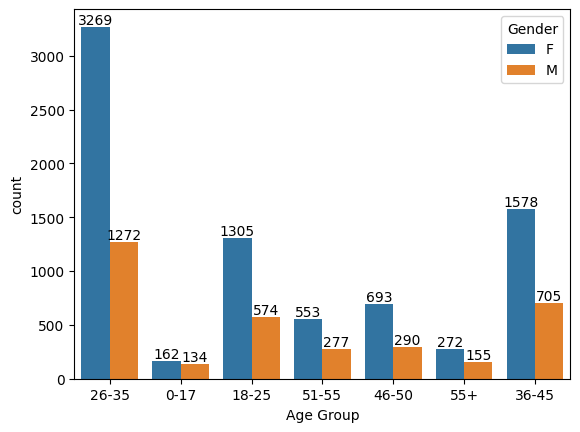

In [23]:
ax = sns.countplot(data=df,x = 'Age Group',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

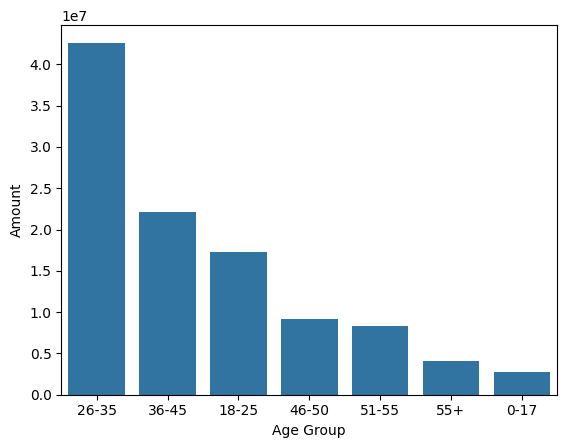

In [29]:
sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by = 'Amount',ascending=False)
sns.barplot(x = 'Age Group',y = 'Amount',data=sales_age)

FROM THE ABOVE GRAPH WE CAN SEE THAT MOST OF THE BYERS ARE FROM AGE GROUP 26-35

STATE


<Axes: xlabel='State', ylabel='Orders'>

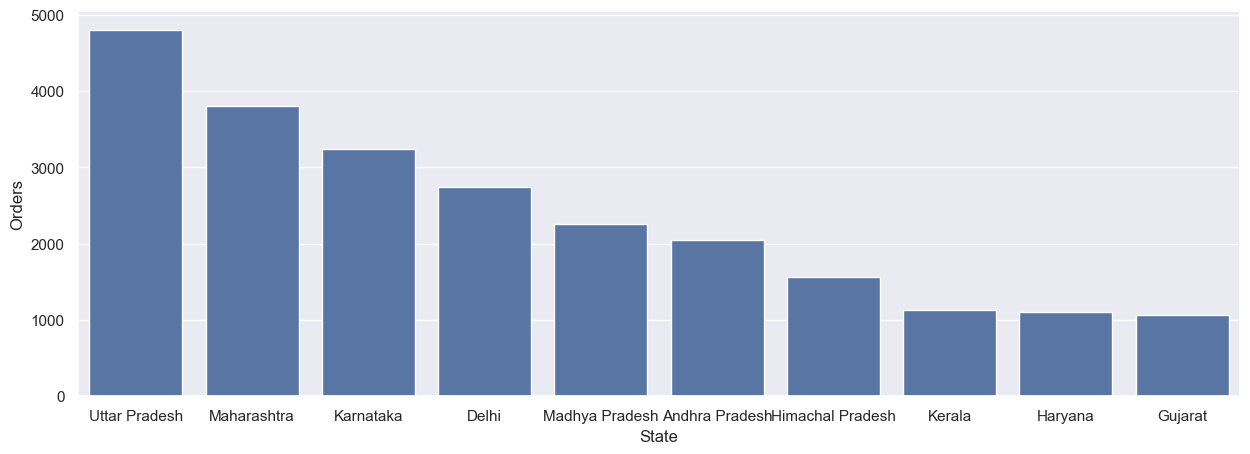

In [33]:
sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by = 'Orders',ascending=False).head(10)
sns.set(rc = {"figure.figsize":(15,5)})
sns.barplot(x = 'State',y = 'Orders',data=sales_state)